#### Calculating the percent share of forestry & mining/quarrying in total employment per municipality for 2022 (PSA Labor Force Survey)

Step 1: Import pandas

In [1]:
import pandas as pd
import numpy as np

Step 2: Combine all csv files in folder into one DF

In [2]:
# Import glob module to find files in directory
import glob

In [3]:
# Store all csv filenames in list
file_list = glob.glob(r"L*.csv")
file_list

['LFS PUF April 2022.csv',
 'LFS PUF August 2022.CSV',
 'LFS PUF December 2022.CSV',
 'LFS PUF February 2022.csv',
 'LFS PUF January 2022.csv',
 'LFS PUF July 2022.CSV',
 'LFS PUF June 2022.csv',
 'LFS PUF March 2022.csv',
 'LFS PUF May 2022.csv',
 'LFS PUF November 2022.CSV',
 'LFS PUF October 2022.CSV',
 'LFS PUF September 2022.CSV']

In [4]:
# Create empty dataframe to store all combined DFs
lfs_2022_df = pd.DataFrame()

# Define function to check if column name...
# ...contains 'REG', 'WORK', 'PROVMUN', or 'PKB'
def check_str(col_name):
     substrs = ['REG','_WORK', '_PROVMUN', '_PKB']
     return any(x in col_name for x in substrs)

# For each csv file in folder...
for fp in file_list:
    # ...read into a DF, w/ specified cols & NaN values...
    df = pd.read_csv(fp, usecols=check_str,
                    na_values=[' ', '  ', '   ', '    ', '     ', '      '])
    
    # ...then append to empty DF for whole year
    lfs_2022_df = pd.concat([lfs_2022_df, df], ignore_index=True)
    
# Display head of merged DF
lfs_2022_df.head(20)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB,PUFC09_WORK,PUFC09A_WORK,PUFC11A_PROVMUN,PUFC15_PKB
0,1,1.0,2802.0,1.0,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1.0,2802.0,1.0,NaN,NaN,NaN,NaN
5,1,1.0,2820.0,82.0,NaN,NaN,NaN,NaN
6,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1,1.0,2802.0,85.0,NaN,NaN,NaN,NaN
8,1,1.0,2802.0,85.0,NaN,NaN,NaN,NaN
9,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN


Step 3: Merge all alike columns and drop extra columns

In [5]:
# Examine first 20 rows where PUFC11_WORK is not null
lfs_2022_df.loc[~lfs_2022_df['PUFC11_WORK'].isnull()].head(20)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB,PUFC09_WORK,PUFC09A_WORK,PUFC11A_PROVMUN,PUFC15_PKB
0,1,1.0,2802.0,1.0,NaN,NaN,NaN,NaN
4,1,1.0,2802.0,1.0,NaN,NaN,NaN,NaN
5,1,1.0,2820.0,82.0,NaN,NaN,NaN,NaN
6,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
7,1,1.0,2802.0,85.0,NaN,NaN,NaN,NaN
8,1,1.0,2802.0,85.0,NaN,NaN,NaN,NaN
9,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN
11,1,1.0,2802.0,1.0,NaN,NaN,NaN,NaN
12,1,1.0,2802.0,1.0,NaN,NaN,NaN,NaN


In [6]:
# For all rows where PUFC11_WORK is null, copy values from PUFC09_WORK and PUFC09A_WORK
lfs_2022_df.loc[lfs_2022_df['PUFC11_WORK'].isnull(), 'PUFC11_WORK'] =\
    lfs_2022_df['PUFC09_WORK']

lfs_2022_df.loc[lfs_2022_df['PUFC11_WORK'].isnull(), 'PUFC11_WORK'] =\
    lfs_2022_df['PUFC09A_WORK']

lfs_2022_df.tail(10)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB,PUFC09_WORK,PUFC09A_WORK,PUFC11A_PROVMUN,PUFC15_PKB
1655195,17,2.0,NaN,NaN,2.0,NaN,NaN,NaN
1655196,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1655197,17,2.0,NaN,NaN,2.0,NaN,NaN,NaN
1655198,17,1.0,NaN,NaN,1.0,1.0,5914.0,41.0
1655199,17,2.0,NaN,NaN,2.0,NaN,NaN,NaN
1655200,17,2.0,NaN,NaN,2.0,NaN,NaN,NaN
1655201,17,1.0,NaN,NaN,1.0,1.0,5914.0,41.0
1655202,17,1.0,NaN,NaN,1.0,1.0,1014.0,96.0
1655203,17,2.0,NaN,NaN,2.0,NaN,NaN,NaN
1655204,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop extra WORK columns
lfs_2022_df = lfs_2022_df.drop(['PUFC09_WORK', 'PUFC09A_WORK'], axis=1)
lfs_2022_df.tail(10)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB,PUFC11A_PROVMUN,PUFC15_PKB
1655195,17,2.0,NaN,NaN,NaN,NaN
1655196,17,NaN,NaN,NaN,NaN,NaN
1655197,17,2.0,NaN,NaN,NaN,NaN
1655198,17,1.0,NaN,NaN,5914.0,41.0
1655199,17,2.0,NaN,NaN,NaN,NaN
1655200,17,2.0,NaN,NaN,NaN,NaN
1655201,17,1.0,NaN,NaN,5914.0,41.0
1655202,17,1.0,NaN,NaN,1014.0,96.0
1655203,17,2.0,NaN,NaN,NaN,NaN
1655204,17,NaN,NaN,NaN,NaN,NaN


Repeat Step 3 for PROVMUN and PKB columns

In [8]:
# For all rows where PUFC12A_PROVMUN is null, copy values from PUFC11A_PROVMUN
lfs_2022_df.loc[lfs_2022_df['PUFC12A_PROVMUN'].isnull(), 'PUFC12A_PROVMUN'] =\
    lfs_2022_df['PUFC11A_PROVMUN']

lfs_2022_df.tail(10)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB,PUFC11A_PROVMUN,PUFC15_PKB
1655195,17,2.0,NaN,NaN,NaN,NaN
1655196,17,NaN,NaN,NaN,NaN,NaN
1655197,17,2.0,NaN,NaN,NaN,NaN
1655198,17,1.0,5914.0,NaN,5914.0,41.0
1655199,17,2.0,NaN,NaN,NaN,NaN
1655200,17,2.0,NaN,NaN,NaN,NaN
1655201,17,1.0,5914.0,NaN,5914.0,41.0
1655202,17,1.0,1014.0,NaN,1014.0,96.0
1655203,17,2.0,NaN,NaN,NaN,NaN
1655204,17,NaN,NaN,NaN,NaN,NaN


In [9]:
# For all rows where PUFC6_PKB is null, copy values from PUFC15_PKB
lfs_2022_df.loc[lfs_2022_df['PUFC16_PKB'].isnull(), 'PUFC16_PKB'] =\
    lfs_2022_df['PUFC15_PKB']

lfs_2022_df.tail(10)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB,PUFC11A_PROVMUN,PUFC15_PKB
1655195,17,2.0,NaN,NaN,NaN,NaN
1655196,17,NaN,NaN,NaN,NaN,NaN
1655197,17,2.0,NaN,NaN,NaN,NaN
1655198,17,1.0,5914.0,41.0,5914.0,41.0
1655199,17,2.0,NaN,NaN,NaN,NaN
1655200,17,2.0,NaN,NaN,NaN,NaN
1655201,17,1.0,5914.0,41.0,5914.0,41.0
1655202,17,1.0,1014.0,96.0,1014.0,96.0
1655203,17,2.0,NaN,NaN,NaN,NaN
1655204,17,NaN,NaN,NaN,NaN,NaN


In [10]:
# Drop extra PROVMUN and PKB columns
lfs_2022_df = lfs_2022_df.drop(['PUFC11A_PROVMUN', 'PUFC15_PKB'], axis=1)
lfs_2022_df.tail(10)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB
1655195,17,2.0,NaN,NaN
1655196,17,NaN,NaN,NaN
1655197,17,2.0,NaN,NaN
1655198,17,1.0,5914.0,41.0
1655199,17,2.0,NaN,NaN
1655200,17,2.0,NaN,NaN
1655201,17,1.0,5914.0,41.0
1655202,17,1.0,1014.0,96.0
1655203,17,2.0,NaN,NaN
1655204,17,NaN,NaN,NaN


Step 4: Save to new DF only the rows where WORK = 1 (employed)

In [11]:
work_df = lfs_2022_df.loc[lfs_2022_df['PUFC11_WORK'] == 1]
work_df.sample(20)

,PUFREG,PUFC11_WORK,PUFC12A_PROVMUN,PUFC16_PKB
1059887,1,1.0,2921.0,92.0
1229073,16,1.0,6724.0,47.0
1307026,8,1.0,6011.0,1.0
1578639,14,1.0,4405.0,84.0
514193,6,1.0,3022.0,84.0
835811,13,1.0,7501.0,47.0
198555,6,1.0,4503.0,85.0
925935,14,1.0,3206.0,1.0
744140,11,1.0,2412.0,85.0
1233233,17,1.0,4005.0,1.0


Step 5: Rename columns and drop work indicator column

In [12]:
col_names = {
    'PUFREG': 'REGION',
    'PUFC12A_PROVMUN': 'PROV_MUN',
    'PUFC16_PKB': 'INDUSTRY'
}

work_df = work_df.rename(columns=col_names)[['REGION', 'PROV_MUN', 'INDUSTRY']]
work_df.sample(20)

,REGION,PROV_MUN,INDUSTRY
413233,3,6911.0,1.0
1064804,2,1502.0,85.0
125761,13,7403.0,47.0
777138,12,6303.0,45.0
318704,17,4005.0,1.0
511112,5,6216.0,96.0
1167829,11,8603.0,3.0
458946,4,5624.0,47.0
3358,1,3302.0,1.0
1478383,6,3008.0,3.0


Step 6: Parse province out of PROV_MUN column

In [13]:
# Remove decimal place from prov-muni by converting to int
work_df['PROV_MUN'] = work_df['PROV_MUN'].astype(int)

# Convert to string, pad w/ leading zeroes up to 4 chars,
# then slice out first 2 chars as province code
work_df['PROVINCE'] = work_df['PROV_MUN'].astype(str)\
                      .str.zfill(4).str.slice(0,2)

work_df.sample(20)

,REGION,PROV_MUN,INDUSTRY,PROVINCE
1350896,7,4610,82.0,46
1073498,3,1412,82.0,14
181940,17,5317,1.0,53
283166,4,3405,41.0,34
1066059,2,1527,49.0,15
88924,9,7341,10.0,73
17917,3,4910,1.0,49
1399668,8,6405,56.0,64
676550,9,8311,1.0,83
75095,8,3747,18.0,37


In [14]:
# Count number of unique municipality codes
len(work_df['PROV_MUN'].unique())

1637

In [15]:
# Count number of unique province codes
len(work_df['PROVINCE'].unique())

87

Step 7: Group DF by municipality

In [16]:
by_muni = work_df.groupby('PROV_MUN')
len(by_muni)

1637

Step 8: Calculate percent share of agriculture in total employment per municipality

In [17]:
# Create empty dataframe for aggregated values
forshare_by_muni = pd.DataFrame()

# Set list of industry IDs corresponding to forestry & mining/quarrying
# work_ids = [2, 5, 6, 7, 8, 9]
work_ids = [2]

# Iterate over ach municipality
for key, group in by_muni:

    # Create empty series to store each calculation
    c = pd.Series()

    # Add region & muni code to series of values
    c['REGION'] = group['REGION'].median().astype(int)
    c['PROVINCE'] = group['PROVINCE'].astype(int).median()
    c['PROV_MUN'] = key

    # Count total number of employed (i.e. length per group)
    c['TOTAL_EMPLOYED'] = group['INDUSTRY'].count()

    # Count number of people employed in forestry or mining/quarrying
    c['FOREST_EMPLOYED'] = group.loc[group['INDUSTRY'].isin(work_ids), 'INDUSTRY'].count()

    # Calculate ratio between agri & total employment
    # and round off values to 2 decimal places
    c['PERCENT_FOREST'] = c['FOREST_EMPLOYED'] / c['TOTAL_EMPLOYED'] * 100
    c['PERCENT_FOREST'] = round(c['PERCENT_FOREST'], 2)

    # Convert series into dataframe and transpose into a row
    row = c.to_frame().transpose()

    # Append new row into forshare_by_muni dataframe
    forshare_by_muni = pd.concat([forshare_by_muni, row], ignore_index=True)

forshare_by_muni

,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST
0,14.0,1.0,101.0,1725.0,4.0,0.23
1,14.0,1.0,102.0,161.0,0.0,0.00
2,14.0,1.0,103.0,492.0,3.0,0.61
3,14.0,1.0,104.0,104.0,1.0,0.96
4,14.0,1.0,105.0,52.0,1.0,1.92
...,...,...,...,...,...,...
1632,11.0,86.0,8603.0,2296.0,10.0,0.44
1633,11.0,86.0,8604.0,1026.0,11.0,1.07
1634,11.0,86.0,8605.0,438.0,3.0,0.68
1635,9.0,97.0,9701.0,2236.0,24.0,1.07


Step 9: Read metadata file into DF of province & municipality names

In [18]:
# Read metadata xlsx file as DF

names_fp = r"lfs_november_2022_metadata(dictionary).xlsx"

geo_names = pd.read_excel(names_fp, sheet_name=r"lfs_november_2022_valueset",
                          skiprows=168, skipfooter=284)

# Define dict to rename columns
new_cols = {
    'Unnamed: 2': 'LOCATION',
    'Unnamed: 3': 'LOC_CODE'
}

geo_names = geo_names.rename(columns=new_cols)[['LOCATION', 'LOC_CODE']]

geo_names.sample(10)

,LOCATION,LOC_CODE
565,2911 ILOCOS SUR - Lidlidda,2911.0
1302,5912 ROMBLON - San Andres,5912.0
1036,4716 NORTH COTABATO - Banisilan,4716.0
1037,4717 NORTH COTABATO - Aleosan,4717.0
762,3613 LANAO DEL SUR - Madalum,3613.0
1217,5536 PANGASINAN - San Nicolas,5536.0
313,1607 CAMARINES NORTE - Mercedes,1607.0
513,2616 EASTERN SAMAR - Mercedes,2616.0
225,1242 BOHOL - City of Tagbilaran (Capital),1242.0
847,3815 MAGUINDANAO - Upi,3815.0


In [19]:
# Split LOCATION column into province and municipality
names = geo_names['LOCATION'].str.split(' - ', expand=True)

# Put first item of split list into PROV_NAME column
# But only get all chars after 4-digit code and space
geo_names['PROV_NAME'] = names[0].str.slice(start=6)

# Put second item of split list into MUN_NAME column
geo_names['MUN_NAME'] = names[1]

geo_names.sample(10)


,LOCATION,LOC_CODE,PROV_NAME,MUN_NAME
299,1522 CAGAYAN - Sanchez-Mira,1522.0,CAGAYAN,Sanchez-Mira
690,3313 LA UNION - Rosario,3313.0,LA UNION,Rosario
1149,5314 PALAWAN - Magsaysay,5314.0,PALAWAN,Magsaysay
355,1737 CAMARINES SUR - Tinambac,1737.0,CAMARINES SUR,Tinambac
1072,4910 NUEVA ECIJA - General Tinio (Papaya),4910.0,NUEVA ECIJA,General Tinio (Papaya)
245,1314 BUKIDNON - Manolo Fortich,1314.0,BUKIDNON,Manolo Fortich
81,0512 ALBAY - Oas,512.0,ALBAY,Oas
36,0210 AGUSAN DEL NORTE - Santiago,210.0,AGUSAN DEL NORTE,Santiago
1517,7218 ZAMBOANGA DEL NORTE - Sindangan,7218.0,ZAMBOANGA DEL NORTE,Sindangan
1083,4921 NUEVA ECIJA - Peñaranda,4921.0,NUEVA ECIJA,Peñaranda


In [20]:
# Drop unneeded LOCATION column
geo_names.drop(columns=['LOCATION'], inplace=True)

geo_names.sample(10)

,LOC_CODE,PROV_NAME,MUN_NAME
1642,8603.0,DAVAO OCCIDENTAL,Malita (Capital)
1038,4718.0,NORTH COTABATO,Arakan
336,1718.0,CAMARINES SUR,Libmanan
712,3415.0,LAGUNA,Magdalena
1643,8604.0,DAVAO OCCIDENTAL,Santa Maria
519,2622.0,EASTERN SAMAR,Sulat
771,3622.0,LANAO DEL SUR,Poona Bayabao (Gata)
1276,5706.0,QUIRINO,Nagtipunan
1608,8203.0,DAVAO DE ORO (COMPOSTELA VALLEY),Mabini (Doña Alicia)
1146,5311.0,PALAWAN,Dumaran


Step 10: Join names DF with employment DF (on muni code)

In [21]:
forshare_by_muni = forshare_by_muni.merge(right=geo_names, left_on='PROV_MUN', right_on='LOC_CODE')

forshare_by_muni.sample(10)

,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,LOC_CODE,PROV_NAME,MUN_NAME
659,2.0,31.0,3131.0,318.0,0.0,0.00,3131.0,ISABELA,San Mariano
699,4.0,34.0,3406.0,153.0,0.0,0.00,3406.0,LAGUNA,Calauan
1122,17.0,52.0,5208.0,625.0,3.0,0.48,5208.0,ORIENTAL MINDORO,Naujan
403,4.0,21.0,2116.0,24.0,0.0,0.00,2116.0,CAVITE,Noveleta
1634,11.0,86.0,8605.0,438.0,3.0,0.68,8605.0,DAVAO OCCIDENTAL,Sarangani
1016,12.0,47.0,4702.0,792.0,2.0,0.25,4702.0,NORTH COTABATO,Carmen
367,6.0,19.0,1908.0,186.0,0.0,0.00,1908.0,CAPIZ,Mambusao
496,11.0,25.0,2511.0,357.0,5.0,1.40,2511.0,DAVAO ORIENTAL,Tarragona
1332,5.0,62.0,6204.0,252.0,6.0,2.38,6204.0,SORSOGON,Bulusan
221,7.0,12.0,1239.0,55.0,0.0,0.00,1239.0,BOHOL,Sevilla


Step 11: Clean up province and municipality names

In [22]:
# Remove parentheticals from province & municipality names
# forshare_by_muni['PROV_NAME'] = forshare_by_muni['PROV_NAME'].str.replace(r"\(.+\)", "")

aliases = forshare_by_muni['PROV_NAME'].str.split(' \(', expand=True)
forshare_by_muni['PROV_NAME'] = aliases[0].str.strip()

list(forshare_by_muni['PROV_NAME'].unique())

<>:4: SyntaxWarning: invalid escape sequence '\('
<>:4: SyntaxWarning: invalid escape sequence '\('
C:\Users\HOWARD\AppData\Local\Temp\ipykernel_13216\1199075241.py:4: SyntaxWarning: invalid escape sequence '\('
  aliases = forshare_by_muni['PROV_NAME'].str.split(' \(', expand=True)


['ABRA',
 'AGUSAN DEL NORTE',
 'AGUSAN DEL SUR',
 'AKLAN',
 'ALBAY',
 'ANTIQUE',
 'BASILAN',
 'BATAAN',
 'BATANES',
 'BATANGAS',
 'BENGUET',
 'BOHOL',
 'BUKIDNON',
 'BULACAN',
 'CAGAYAN',
 'CAMARINES NORTE',
 'CAMARINES SUR',
 'CAMIGUIN',
 'CAPIZ',
 'CATANDUANES',
 'CAVITE',
 'CEBU',
 'DAVAO DEL NORTE',
 'DAVAO DEL SUR',
 'DAVAO ORIENTAL',
 'EASTERN SAMAR',
 'IFUGAO',
 'ILOCOS NORTE',
 'ILOCOS SUR',
 'ILOILO',
 'ISABELA',
 'KALINGA',
 'LA UNION',
 'LAGUNA',
 'LANAO DEL NORTE',
 'LANAO DEL SUR',
 'LEYTE',
 'MAGUINDANAO',
 'City of Manila',
 'MARINDUQUE',
 'MASBATE',
 'MISAMIS OCCIDENTAL',
 'MISAMIS ORIENTAL',
 'MOUNTAIN PROVINCE',
 'NEGROS OCCIDENTAL',
 'NEGROS ORIENTAL',
 'NORTH COTABATO',
 'NORTHERN SAMAR',
 'NUEVA ECIJA',
 'NUEVA VIZCAYA',
 'OCCIDENTAL MINDORO',
 'ORIENTAL MINDORO',
 'PALAWAN',
 'PAMPANGA',
 'PANGASINAN',
 'QUEZON',
 'QUIRINO',
 'RIZAL',
 'ROMBLON',
 'SAMAR',
 'SIQUIJOR',
 'SORSOGON',
 'SOUTH COTABATO',
 'SOUTHERN LEYTE',
 'SULTAN KUDARAT',
 'SULU',
 'SURIGAO DEL NOR

In [23]:
# Do the same for municipality names
aliases = forshare_by_muni['MUN_NAME'].str.split(' \(', expand=True)
forshare_by_muni['MUN_NAME'] = aliases[0].str.strip()

forshare_by_muni['MUN_NAME'].head(20)

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
C:\Users\HOWARD\AppData\Local\Temp\ipykernel_13216\3256188567.py:2: SyntaxWarning: invalid escape sequence '\('
  aliases = forshare_by_muni['MUN_NAME'].str.split(' \(', expand=True)


0         Bangued
1         Boliney
2           Bucay
3          Bucloc
4       Daguioman
5         Danglas
6         Dolores
7          La Paz
8           Lacub
9     Lagangilang
10        Lagayan
11       Langiden
12    Licuan-Baay
13           Luba
14      Malibcong
15         Manabo
16     Peñarrubia
17        Pidigan
18          Pilar
19     Sallapadan
Name: MUN_NAME, dtype: object

Step 9B: Clean up some rows

In [24]:
# Define dict w/ keys = old names and values = fixed names
city_names = {
    'Calaca': 'City of Calaca',
    'Pres. Carlos P. Garcia': 'President Carlos P. Garcia',
    'Baliuag': 'City of Baliwag',
    'Carmona': 'City of Carmona',
    'Datu Saudi-Ampatuan': 'Datu Saudi Ampatuan',
    'Pio V. Corpuz': 'Pio V. Corpus',
    'Bacungan': 'Leon T. Postigo',
    'Hinoba-an': 'Hinoba-An'
}

forshare_by_muni.replace({'MUN_NAME': city_names}, inplace=True)

new_names = list(city_names.values())

forshare_by_muni.loc[forshare_by_muni['MUN_NAME'].isin(new_names)]

,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,LOC_CODE,PROV_NAME,MUN_NAME
142,4.0,10.0,1007.0,110.0,0.0,0.00,1007.0,BATANGAS,City of Calaca
217,7.0,12.0,1235.0,115.0,2.0,1.74,1235.0,BOHOL,President Carlos P. Garcia
255,3.0,14.0,1403.0,514.0,1.0,0.19,1403.0,BULACAN,City of Baliwag
391,4.0,21.0,2104.0,285.0,0.0,0.00,2104.0,CAVITE,City of Carmona
853,15.0,38.0,3826.0,115.0,1.0,0.87,3826.0,MAGUINDANAO,Datu Saudi Ampatuan
899,5.0,41.0,4116.0,211.0,0.0,0.00,4116.0,MASBATE,Pio V. Corpus
969,6.0,45.0,4512.0,107.0,0.0,0.00,4512.0,NEGROS OCCIDENTAL,Hinoba-An
1515,9.0,72.0,7226.0,7.0,0.0,0.00,7226.0,ZAMBOANGA DEL NORTE,Leon T. Postigo


In [25]:
# Assign municipality names for City of Isabela and City of Cotabato
forshare_by_muni.loc[forshare_by_muni['PROV_NAME'] == 'CITY OF ISABELA', 'MUN_NAME'] \
    = 'City of Isabela'

forshare_by_muni.loc[forshare_by_muni['PROV_NAME'] == 'COTABATO CITY', 'MUN_NAME'] \
    = 'City of Cotabato'

forshare_by_muni.loc[forshare_by_muni['MUN_NAME'].isin(['City of Isabela', 'City of Cotabato'])]

,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,LOC_CODE,PROV_NAME,MUN_NAME
1635,9.0,97.0,9701.0,2236.0,24.0,1.07,9701.0,CITY OF ISABELA,City of Isabela
1636,12.0,98.0,9804.0,4091.0,5.0,0.12,9804.0,COTABATO CITY,City of Cotabato


In [26]:
# Merge all Manila sub-municipalities into one municipality (City of Manila)
manila = forshare_by_muni.loc[forshare_by_muni['PROVINCE'] == 39]\
        .groupby('PROVINCE', as_index=False)\
        .agg({
            'REGION': 'min',
            'PROVINCE': 'min',
            'PROV_MUN': 'min',
            'TOTAL_EMPLOYED': 'sum',
            'FOREST_EMPLOYED': 'sum',
            'PERCENT_FOREST': 'min',
            'LOC_CODE': 'min',
            'PROV_NAME': 'first',
            'MUN_NAME': 'first'
        })

# Re-calculate PERCENT_FOREST and assign municipality name
manila['PERCENT_FOREST'] = round(manila['FOREST_EMPLOYED'] / manila['TOTAL_EMPLOYED'] * 100, 2)
manila['MUN_NAME'].replace({'Tondo I/II': 'City of Manila'}, inplace=True)

# Append new row into agshare DF
forshare_by_muni = pd.concat([forshare_by_muni, manila], ignore_index=True)

# Drop all Manila sub-municipalities
drop_indexes = forshare_by_muni.loc[(forshare_by_muni['PROVINCE'] == 39) & (forshare_by_muni['MUN_NAME'] != 'City of Manila')].index
forshare_by_muni.drop(drop_indexes, inplace=True)

forshare_by_muni.loc[forshare_by_muni['PROVINCE'] == 39]

,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,LOC_CODE,PROV_NAME,MUN_NAME
1637,13.0,39.0,3901.0,8087.0,0.0,0.0,3901.0,City of Manila,City of Manila


Step 12: Join agshare table with PGSC codes

In [27]:
# Define filepath to xlsx file with municipality PSGC codes
psgc_fp = r"C:\Users\HOWARD\Desktop\DENR CCIMS\C - VULNERABILITY\Health Vulnerability\ABM3_PercentRural_PSA_2020.xlsx"

# Read excel file as DF
psgc_df = pd.read_excel(psgc_fp, # sheet_name='PSGC',
                        usecols=['ADM2', 'ADM3_EN', 'ADM3_CODE'])

psgc_df.head(10)

,ADM2,ADM3_EN,ADM3_CODE
0,"NCR, First District, City of Manila",City of Manila,133900000
1,"NCR, Second District",City of Mandaluyong,137401000
2,"NCR, Second District",City of Marikina,137402000
3,"NCR, Second District",City of Pasig,137403000
4,"NCR, Second District",Quezon City,137404000
5,"NCR, Second District",City of San Juan,137405000
6,"NCR, Third District",City of Caloocan,137501000
7,"NCR, Third District",City of Malabon,137502000
8,"NCR, Third District",City of Navotas,137503000
9,"NCR, Third District",City of Valenzuela,137504000


Clean up municipality names and codes before joining

In [28]:
# Clean up data: convert 0 into -
psgc_df['ADM3_EN'] = psgc_df['ADM3_EN'].replace('0', '-', regex=True)

# Remove parentheticals from municipality names
aliases = psgc_df['ADM3_EN'].str.split(' \(', expand=True)
psgc_df['ADM3_EN'] = aliases[0].str.strip()

# Convert muni code to string
psgc_df['ADM3_CODE'] = psgc_df['ADM3_CODE'].astype(str).str.zfill(9)

# Check all rows where code starts with '0215' (Cagayan)
psgc_df.loc[psgc_df['ADM3_CODE'].str.startswith('0215')].head(30)

<>:5: SyntaxWarning: invalid escape sequence '\('
<>:5: SyntaxWarning: invalid escape sequence '\('
C:\Users\HOWARD\AppData\Local\Temp\ipykernel_13216\3352324886.py:5: SyntaxWarning: invalid escape sequence '\('
  aliases = psgc_df['ADM3_EN'].str.split(' \(', expand=True)


,ADM2,ADM3_EN,ADM3_CODE
225,Cagayan,Abulug,021501000
226,Cagayan,Alcala,021502000
227,Cagayan,Allacapan,021503000
228,Cagayan,Amulung,021504000
229,Cagayan,Aparri,021505000
230,Cagayan,Baggao,021506000
231,Cagayan,Ballesteros,021507000
232,Cagayan,Buguey,021508000
233,Cagayan,Calayan,021509000
234,Cagayan,Camalaniugan,021510000


In [29]:
# In ADM2, change Cotabato to North Cotabato
psgc_df.loc[psgc_df['ADM2'] == 'Cotabato', 'ADM2'] = 'North Cotabato'

# Change ADM2 of Cotabato City to Cotabato City
psgc_df.loc[psgc_df['ADM3_EN'] == 'City of Cotabato', 'ADM2'] = 'Cotabato City'

# Change ADM2 of City of Manila to City of Manila
psgc_df.loc[psgc_df['ADM3_EN'] == 'City of Manila', 'ADM2'] = 'City of Manila'

# Change ADM3_EN of Sto. Tomas (in Pampanga) to Santo Tomas
psgc_df.loc[psgc_df['ADM3_EN'] == 'Sto. Tomas', 'ADM3_EN'] = 'Santo Tomas'

Perform join

In [30]:
# Join province PSGC codes to province names
forshare_by_muni_psgc = forshare_by_muni.merge(psgc_df, how='left', 
                                            left_on=[forshare_by_muni['PROV_NAME'].str.lower(), forshare_by_muni['MUN_NAME'].str.lower()],
                                            right_on=[psgc_df['ADM2'].str.lower(), psgc_df['ADM3_EN'].str.lower()])
                                             # left_on='MUN_NAME', 
                                             # right_on='ADM3_EN')

forshare_by_muni_psgc.loc[forshare_by_muni_psgc['PROV_NAME'] == 'CAGAYAN']

,key_0,key_1,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,LOC_CODE,PROV_NAME,MUN_NAME,ADM2,ADM3_EN,ADM3_CODE
277,cagayan,abulug,2.0,15.0,1501.0,224.0,0.0,0.00,1501.0,CAGAYAN,Abulug,Cagayan,Abulug,021501000
278,cagayan,alcala,2.0,15.0,1502.0,300.0,1.0,0.33,1502.0,CAGAYAN,Alcala,Cagayan,Alcala,021502000
279,cagayan,allacapan,2.0,15.0,1503.0,209.0,0.0,0.00,1503.0,CAGAYAN,Allacapan,Cagayan,Allacapan,021503000
280,cagayan,amulung,2.0,15.0,1504.0,153.0,0.0,0.00,1504.0,CAGAYAN,Amulung,Cagayan,Amulung,021504000
281,cagayan,aparri,2.0,15.0,1505.0,332.0,0.0,0.00,1505.0,CAGAYAN,Aparri,Cagayan,Aparri,021505000
282,cagayan,baggao,2.0,15.0,1506.0,320.0,0.0,0.00,1506.0,CAGAYAN,Baggao,Cagayan,Baggao,021506000
283,cagayan,ballesteros,2.0,15.0,1507.0,300.0,0.0,0.00,1507.0,CAGAYAN,Ballesteros,Cagayan,Ballesteros,021507000
284,cagayan,buguey,2.0,15.0,1508.0,147.0,0.0,0.00,1508.0,CAGAYAN,Buguey,Cagayan,Buguey,021508000
285,cagayan,calayan,2.0,15.0,1509.0,2.0,0.0,0.00,1509.0,CAGAYAN,Calayan,Cagayan,Calayan,021509000
286,cagayan,camalaniugan,2.0,15.0,1510.0,100.0,0.0,0.00,1510.0,CAGAYAN,Camalaniugan,Cagayan,Camalaniugan,021510000


In [31]:
# Check if some rows failed to join
forshare_by_muni_psgc.loc[forshare_by_muni_psgc['ADM3_CODE'].isnull()]#['MUN_NAME'].values

,key_0,key_1,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,LOC_CODE,PROV_NAME,MUN_NAME,ADM2,ADM3_EN,ADM3_CODE


In [32]:
forshare_by_muni_psgc.columns

Index(['key_0', 'key_1', 'REGION', 'PROVINCE', 'PROV_MUN', 'TOTAL_EMPLOYED',
       'FOREST_EMPLOYED', 'PERCENT_FOREST', 'LOC_CODE', 'PROV_NAME',
       'MUN_NAME', 'ADM2', 'ADM3_EN', 'ADM3_CODE'],
      dtype='object')

In [33]:
forshare_by_muni_psgc.shape

(1624, 14)

In [34]:
forshare_by_muni_psgc['ADM3_CODE_PH'] = 'PH' + forshare_by_muni_psgc['ADM3_CODE']

forshare_by_muni_psgc.head(10)

,key_0,key_1,REGION,PROVINCE,PROV_MUN,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,LOC_CODE,PROV_NAME,MUN_NAME,ADM2,ADM3_EN,ADM3_CODE,ADM3_CODE_PH
0,abra,bangued,14.0,1.0,101.0,1725.0,4.0,0.23,101.0,ABRA,Bangued,Abra,Bangued,140101000,PH140101000
1,abra,boliney,14.0,1.0,102.0,161.0,0.0,0.00,102.0,ABRA,Boliney,Abra,Boliney,140102000,PH140102000
2,abra,bucay,14.0,1.0,103.0,492.0,3.0,0.61,103.0,ABRA,Bucay,Abra,Bucay,140103000,PH140103000
3,abra,bucloc,14.0,1.0,104.0,104.0,1.0,0.96,104.0,ABRA,Bucloc,Abra,Bucloc,140104000,PH140104000
4,abra,daguioman,14.0,1.0,105.0,52.0,1.0,1.92,105.0,ABRA,Daguioman,Abra,Daguioman,140105000,PH140105000
5,abra,danglas,14.0,1.0,106.0,53.0,0.0,0.00,106.0,ABRA,Danglas,Abra,Danglas,140106000,PH140106000
6,abra,dolores,14.0,1.0,107.0,233.0,0.0,0.00,107.0,ABRA,Dolores,Abra,Dolores,140107000,PH140107000
7,abra,la paz,14.0,1.0,108.0,442.0,5.0,1.13,108.0,ABRA,La Paz,Abra,La Paz,140108000,PH140108000
8,abra,lacub,14.0,1.0,109.0,154.0,0.0,0.00,109.0,ABRA,Lacub,Abra,Lacub,140109000,PH140109000
9,abra,lagangilang,14.0,1.0,110.0,283.0,0.0,0.00,110.0,ABRA,Lagangilang,Abra,Lagangilang,140110000,PH140110000


In [35]:
# Select only relevant columns for final DF (for export)
final_df = forshare_by_muni_psgc[['REGION', 'PROV_NAME', 'ADM3_EN',
                                 'ADM3_CODE_PH', 'TOTAL_EMPLOYED',
                                 'FOREST_EMPLOYED', 'PERCENT_FOREST']]
# Define dict to rename some columns
col_names = {
    'PROV_NAME': 'ADM2_EN',
    'ADM3_CODE_PH': 'ADM3_CODE',
    'REGION': 'REGION_NO' # 'ADM1_CODE'
}

# Apply renaming dict
final_df = final_df.rename(columns=col_names)

# Convert REGION_NO to int to remove decimal

final_df['REGION_NO'] = final_df['REGION_NO'].astype(int)

# final_df['ADM1_CODE'] = 'PH' + final_df['ADM1_CODE'].astype(int).astype(str).str.zfill(2) + '0000000'

final_df.head(20)

,REGION_NO,ADM2_EN,ADM3_EN,ADM3_CODE,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST
0,14,ABRA,Bangued,PH140101000,1725.0,4.0,0.23
1,14,ABRA,Boliney,PH140102000,161.0,0.0,0.00
2,14,ABRA,Bucay,PH140103000,492.0,3.0,0.61
3,14,ABRA,Bucloc,PH140104000,104.0,1.0,0.96
4,14,ABRA,Daguioman,PH140105000,52.0,1.0,1.92
5,14,ABRA,Danglas,PH140106000,53.0,0.0,0.00
6,14,ABRA,Dolores,PH140107000,233.0,0.0,0.00
7,14,ABRA,La Paz,PH140108000,442.0,5.0,1.13
8,14,ABRA,Lacub,PH140109000,154.0,0.0,0.00
9,14,ABRA,Lagangilang,PH140110000,283.0,0.0,0.00


In [36]:
final_df.to_csv(r'forshare_by_muni.csv', index=False)

Join to ABM3 shapefile (city/muni)

In [37]:
import geopandas as gpd

shp_fp = r"D:\DENR CCIMS\E- Administrative Boundaries\Manila_Dissolved_National_AB3_PSA_NAMRIA_2018.shp"

In [38]:
muni_shp = gpd.read_file(shp_fp)
muni_shp.head()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,fid,layer,path,geometry
0,0.423604,0.009506,Adams,PH012801000,None,None,None,Ilocos Norte,PH012800000,Region I,PH010000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((120.94626 18.51158, 120.96915 18.510..."
1,0.309136,0.004725,Bacarra,PH012802000,None,None,None,Ilocos Norte,PH012800000,Region I,PH010000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((120.59081 18.29526, 120.59192 18.295..."
2,0.599295,0.006880,Badoc,PH012803000,None,None,None,Ilocos Norte,PH012800000,Region I,PH010000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((120.47783 17.97744, 120.47780 17.977..."
3,0.482911,0.009843,Bangui,PH012804000,None,None,None,Ilocos Norte,PH012800000,Region I,PH010000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((120.79393 18.53475, 120.79537 18.534..."
4,0.613500,0.013493,City of Batac,PH012805000,None,None,None,Ilocos Norte,PH012800000,Region I,PH010000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((120.56070 18.12259, 120.56088 18.122..."


In [39]:
muni_shp = muni_shp.to_crs("EPSG:32651")

In [40]:
muni_shp.loc[muni_shp["ADM2_EN"]\
    == "Negros Occidental", "ADM3_PCODE"]\
    .str.replace(r"PH\d{2}(.*)", r"PH06\1", regex=True)

1575    PH064501000
1576    PH064502000
1577    PH064503000
1578    PH064504000
1579    PH064505000
1580    PH064506000
1581    PH064507000
1582    PH064508000
1583    PH064509000
1584    PH064510000
1585    PH064511000
1586    PH064512000
1587    PH064513000
1588    PH064514000
1589    PH064515000
1590    PH064516000
1591    PH064517000
1592    PH064518000
1593    PH064519000
1594    PH064520000
1595    PH064521000
1596    PH064522000
1597    PH064523000
1598    PH064524000
1599    PH064525000
1600    PH064526000
1601    PH064527000
1602    PH064528000
1603    PH064529000
1604    PH064530000
1605    PH064531000
1606    PH064532000
Name: ADM3_PCODE, dtype: object

In [41]:
muni_shp.loc[muni_shp["ADM2_EN"]== "Negros Occidental", "ADM3_PCODE"]\
    = muni_shp.loc[muni_shp["ADM2_EN"]== "Negros Occidental", "ADM3_PCODE"]\
    .str.replace(r"PH\d{2}(.*)", r"PH06\1", regex=True)

muni_shp.loc[muni_shp["ADM2_EN"]== "Negros Oriental", "ADM3_PCODE"]\
    =muni_shp.loc[muni_shp["ADM2_EN"]== "Negros Oriental", "ADM3_PCODE"]\
    .str.replace(r"PH\d{2}(.*)", r"PH07\1", regex=True)

muni_shp.tail()

,Shape_Leng,Shape_Area,ADM3_EN,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,fid,layer,path,geometry
1629,0.545733,0.013398,Valencia,PH074623000,None,Luzurriaga,None,Negros Oriental,PH184600000,Negros Island Region,PH180000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((522801.794 1030563.135, 523227.162 1..."
1630,0.417552,0.007656,Vallehermoso,PH074624000,None,None,None,Negros Oriental,PH184600000,Negros Island Region,PH180000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"MULTIPOLYGON (((536304.315 1136291.900, 536303..."
1631,0.511890,0.012622,Zamboanguita,PH074625000,None,None,None,Negros Oriental,PH184600000,Negros Island Region,PH180000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((518758.614 1020271.782, 520518.096 1..."
1632,0.508401,0.011728,Burgos,PH012806000,None,None,None,Ilocos Norte,PH012800000,Region I,PH010000000,Philippines (the),PH,2016-06-15,2018-01-30,None,NaN,Matching features,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((250481.064 2052397.047, 250482.590 2..."
1633,0.613781,0.003520,City of Manila,PH133900000,None,None,None,"NCR, City of Manila, First District",PH133900000,National Capital Region,None,None,None,None,None,None,1219.0,QueryLayer_5,C:/Users/HOWARD/Desktop/DENR CCIMS/C - VULNERA...,"MULTIPOLYGON (((282428.104 1612088.057, 282419..."


In [42]:
muni_shp = muni_shp.merge(
    final_df,
    how="left",
    left_on="ADM3_PCODE",
    right_on="ADM3_CODE",
    suffixes=["_SHP", "_DF"],
    indicator=True,
    validate="1:1"
)
muni_shp.head()

,Shape_Leng,Shape_Area,ADM3_EN_SHP,ADM3_PCODE,ADM3_REF,ADM3ALT1EN,ADM3ALT2EN,ADM2_EN_SHP,ADM2_PCODE,ADM1_EN,...,path,geometry,REGION_NO,ADM2_EN_DF,ADM3_EN_DF,ADM3_CODE,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,_merge
0,0.423604,0.009506,Adams,PH012801000,None,None,None,Ilocos Norte,PH012800000,Region I,...,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((283183.575 2048019.901, 285598.940 2...",1.0,ILOCOS NORTE,Adams,PH012801000,78.0,0.0,0.00,both
1,0.309136,0.004725,Bacarra,PH012802000,None,None,None,Ilocos Norte,PH012800000,Region I,...,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((245324.498 2024534.314, 245441.030 2...",1.0,ILOCOS NORTE,Bacarra,PH012802000,421.0,0.0,0.00,both
2,0.599295,0.006880,Badoc,PH012803000,None,None,None,Ilocos Norte,PH012800000,Region I,...,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((232891.879 1989504.677, 232889.016 1...",1.0,ILOCOS NORTE,Badoc,PH012803000,517.0,1.0,0.19,both
3,0.482911,0.009843,Bangui,PH012804000,None,None,None,Ilocos Norte,PH012800000,Region I,...,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((267126.964 2050775.282, 267279.972 2...",1.0,ILOCOS NORTE,Bangui,PH012804000,357.0,0.0,0.00,both
4,0.613500,0.013493,City of Batac,PH012805000,None,None,None,Ilocos Norte,PH012800000,Region I,...,MultiPolygon?crs=EPSG:4326&field=Shape_Leng:do...,"POLYGON ((241884.647 2005458.702, 241903.688 2...",1.0,ILOCOS NORTE,City of Batac,PH012805000,843.0,0.0,0.00,both


In [43]:
for index, row in muni_shp.loc[muni_shp.PERCENT_FOREST.isna()].iterrows():
    neighbors = muni_shp[muni_shp.overlaps(row.geometry.buffer(10_000))]
    muni_shp.at[index, "PERCENT_FOREST"] = round(neighbors.PERCENT_FOREST.mean(), 2)

<Axes: >

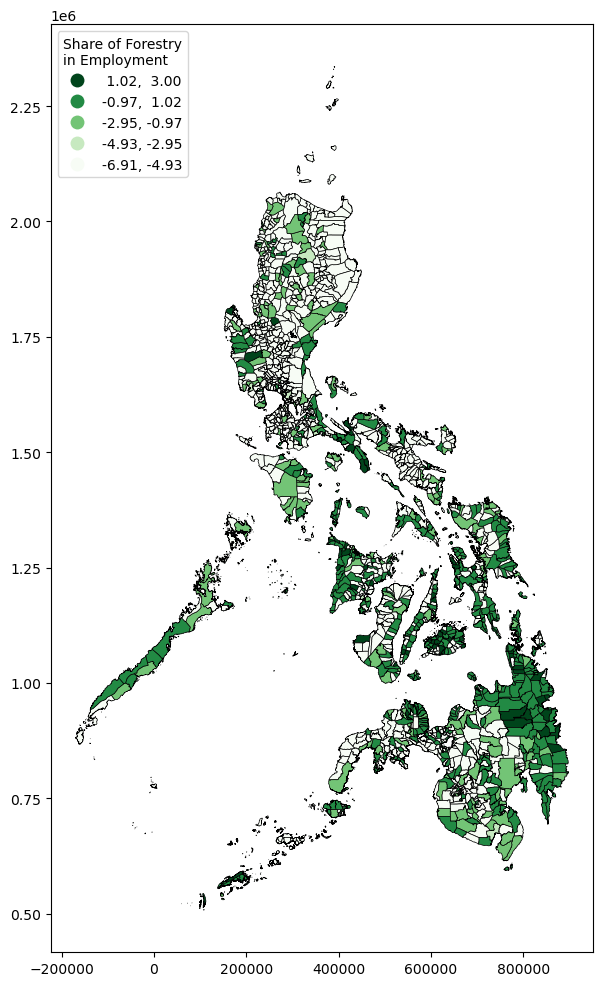

In [44]:
muni_shp.plot(
    column=np.log(muni_shp.PERCENT_FOREST + 0.001),
    cmap="Greens",
    scheme="EqualInterval",
    edgecolor="black",
    linewidth=0.5,
    figsize=(7,15),
    # missing_kwds={
    #     "facecolor": "grey",
    #     "edgecolor": "red"
    # },
    legend=True,
    legend_kwds={
        "title": "Share of Forestry\nin Employment",
        "loc": "upper left",
        "reverse": True
    }
)

In [45]:
muni_shp.columns.values

array(['Shape_Leng', 'Shape_Area', 'ADM3_EN_SHP', 'ADM3_PCODE',
       'ADM3_REF', 'ADM3ALT1EN', 'ADM3ALT2EN', 'ADM2_EN_SHP',
       'ADM2_PCODE', 'ADM1_EN', 'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE',
       'date', 'validOn', 'validTo', 'fid', 'layer', 'path', 'geometry',
       'REGION_NO', 'ADM2_EN_DF', 'ADM3_EN_DF', 'ADM3_CODE',
       'TOTAL_EMPLOYED', 'FOREST_EMPLOYED', 'PERCENT_FOREST', '_merge'],
      dtype=object)

In [46]:
muni_shp = muni_shp[
    [
        "ADM3_EN_SHP",
        "ADM3_PCODE",
        "ADM2_EN_SHP",
        "ADM2_PCODE",
        "ADM1_EN",
        "ADM1_PCODE",
        "TOTAL_EMPLOYED",
        "FOREST_EMPLOYED",
        "PERCENT_FOREST",
        "geometry"
    ]
]

muni_shp = muni_shp.rename(columns=lambda x: x.replace("_SHP", "") if "_SHP" in x else x)

muni_shp.head()

,ADM3_EN,ADM3_PCODE,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,TOTAL_EMPLOYED,FOREST_EMPLOYED,PERCENT_FOREST,geometry
0,Adams,PH012801000,Ilocos Norte,PH012800000,Region I,PH010000000,78.0,0.0,0.00,"POLYGON ((283183.575 2048019.901, 285598.940 2..."
1,Bacarra,PH012802000,Ilocos Norte,PH012800000,Region I,PH010000000,421.0,0.0,0.00,"POLYGON ((245324.498 2024534.314, 245441.030 2..."
2,Badoc,PH012803000,Ilocos Norte,PH012800000,Region I,PH010000000,517.0,1.0,0.19,"POLYGON ((232891.879 1989504.677, 232889.016 1..."
3,Bangui,PH012804000,Ilocos Norte,PH012800000,Region I,PH010000000,357.0,0.0,0.00,"POLYGON ((267126.964 2050775.282, 267279.972 2..."
4,City of Batac,PH012805000,Ilocos Norte,PH012800000,Region I,PH010000000,843.0,0.0,0.00,"POLYGON ((241884.647 2005458.702, 241903.688 2..."


In [48]:
# Save GDF as shapefile
muni_shp.to_file(
    r"D:\DENR CCIMS\B - EXPOSURE\forest land use\forestshare_by_muni_LFS_2022.shp"
)

C:\Users\HOWARD\AppData\Local\Temp\ipykernel_13216\355261447.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  muni_shp.to_file(


Epilogue: calculate mean PERCENT_FOREST per province

In [ ]:
by_prov = final_df.groupby('ADM2_EN', as_index=False).mean(numeric_only=True)

pd.set_option('display.max_rows', None)
by_prov